In [1]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
init_notebook_mode(connected = True)
cf.go_offline()
import plotly.express as px
import ipynb

Import functions from two files I have written, covid-graph-functions.ipynb, containing graph plotting functions, and covid-data-manipulation containing some helper functions to help mainpulate Pandas DataFrames

In [2]:
from ipynb.fs.full.covid_graphs import (basic_info, country_compare_death_rate, 
                                        country_compare_case_rate, icountry_compare, bubbleScatter,
                                        regPlotter, sns_barplot, i_barplot, boxPlotter)


In [3]:
from ipynb.fs.full.covid_data_manipulation import (remove_locations, remove_nulls, add_locations,
single_continent_df, two_continent_df, smoker_df, common_countries, drop_values_from)

In [4]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

Here is our dataset

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205458,ZWE,Africa,Zimbabwe,2022-07-27,256315.0,31.0,18.286,5574.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205459,ZWE,Africa,Zimbabwe,2022-07-28,256336.0,21.0,17.000,5576.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205460,ZWE,Africa,Zimbabwe,2022-07-29,256376.0,40.0,22.714,5577.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205461,ZWE,Africa,Zimbabwe,2022-07-30,256376.0,0.0,18.571,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [6]:
all_countries = list(df['location'].unique())  #all countries in dataset
all_countries

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


C:\Users\dnilf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\dnilf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



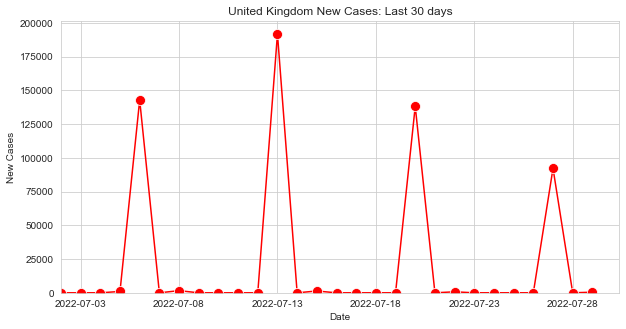

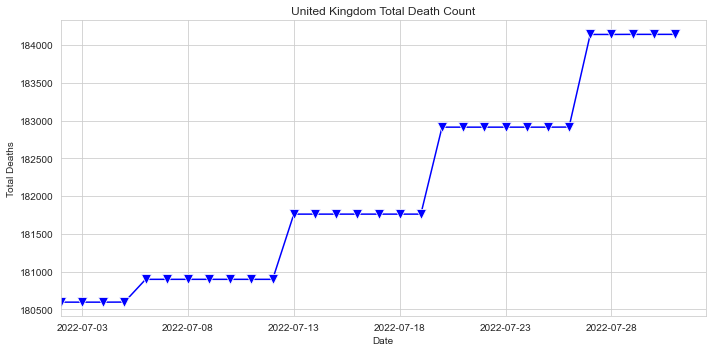

In [7]:
basic_info(df,'GBR')

C:\Users\dnilf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



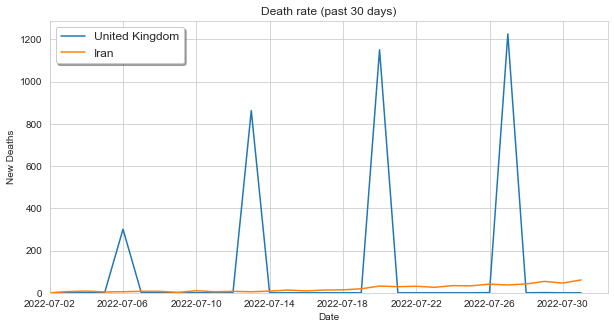

In [8]:
country_compare_death_rate(df,'GBR','IRN')

C:\Users\dnilf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



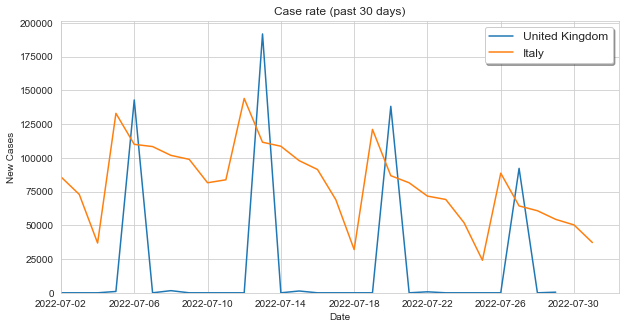

In [9]:
country_compare_case_rate(df,'GBR','ITA')

In [10]:
#can we make the death rate plot interactive?

In [11]:
icountry_compare(df, 'ITA','GBR')

In [12]:
#we want a table with one row for each country- the last available date.
#this will make it easy to access the latest data and also won't bring up loads of rows when u search for one country
#we can make an empty dataframe and append a row from each country to it, one by one with a for loop
#so lets get all column names first
all_cols = list(df.columns)
print(all_cols)
#now we need to make an empty dataframe with these columns
df_comp = pd.DataFrame(columns = all_cols)
df_comp  #df compact

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [13]:
df_comp['iso_code']

Series([], Name: iso_code, dtype: object)

In [14]:
#first we need to drop 'international' and 'world' from  our dataframe. we may use these later

In [15]:
df_no_inter = df
df_no_inter = remove_locations(df_no_inter, 'International', 'World')
df_no_inter

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205458,ZWE,Africa,Zimbabwe,2022-07-27,256315.0,31.0,18.286,5574.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205459,ZWE,Africa,Zimbabwe,2022-07-28,256336.0,21.0,17.000,5576.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205460,ZWE,Africa,Zimbabwe,2022-07-29,256376.0,40.0,22.714,5577.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205461,ZWE,Africa,Zimbabwe,2022-07-30,256376.0,0.0,18.571,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [16]:
#now we only have singular country names.

In [17]:
# all_countries is a list of all countries
df_comp = add_locations(df_comp, df_no_inter, all_countries)

In [18]:
df_comp

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
888,AFG,Asia,Afghanistan,2022-07-31,185749.0,197.0,166.000,7748.0,3.0,1.429,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
1788,OWID_AFR,NaN,Africa,2022-07-31,12257927.0,572.0,5464.143,256031.0,5.0,31.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2676,ALB,Europe,Albania,2022-07-31,312097.0,716.0,1029.571,3545.0,2.0,2.571,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
3564,DZA,Africa,Algeria,2022-07-31,267454.0,80.0,87.857,6876.0,0.0,0.000,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
4446,AND,Europe,Andorra,2022-07-31,45508.0,NaN,NaN,153.0,0.0,0.000,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201966,WLF,Oceania,Wallis and Futuna,2022-07-31,761.0,NaN,NaN,7.0,0.0,0.000,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
201967,ESH,Africa,Western Sahara,2022-04-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.26,NaN,NaN,NaN,NaN,NaN
203732,YEM,Asia,Yemen,2022-07-31,11877.0,0.0,4.000,2151.0,0.0,0.286,...,7.6,29.2,49.542,0.70,66.12,0.470,NaN,NaN,NaN,NaN
204598,ZMB,Africa,Zambia,2022-07-31,329483.0,NaN,NaN,4015.0,0.0,0.286,...,3.1,24.7,13.938,2.00,63.89,0.584,NaN,NaN,NaN,NaN


In [19]:
df_diab  = df_comp[['diabetes_prevalence','total_cases_per_million','location','total_cases',
                    'total_deaths','gdp_per_capita','handwashing_facilities','continent','hospital_beds_per_thousand',
                    'aged_70_older','male_smokers','female_smokers','cardiovasc_death_rate', 'stringency_index', 'population_density',
                     'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'population',
                    'median_age', 'total_deaths_per_million']]
df_diab = remove_nulls(df_diab, 'diabetes_prevalence', 'gdp_per_capita',
                     'total_deaths', 'hospital_beds_per_thousand','aged_70_older')

Contents

i) first we observe some key patterns (and lack of patterns) in global data

ii) europe vs africa study

iii) effectiveness of lockdown - stringency index and effect of population density

iv) summary global graphs

In [20]:
#before we start, we should observe this graph 

In [21]:
bubbleScatter(df_diab, 'total_cases', 'total_deaths', 'total_deaths_per_million', 'location', 
              'log', 'log', 'deaths against cases, size: deaths/mil',  'continent')

Clearly, countries with higher number of cases and higher deaths also have high deaths per million.
No countries have relatively few deaths but a very high number of deaths per million - this would be shown by a bigger circle towards the bottom, which isn't seen in the graph

Are the countries with big  circles NOT at the v top really the ones to blame, rather than high case countries?
what about countries with many but actually few per million- don't they deserve more credit? e.g., india, a small circle at top?

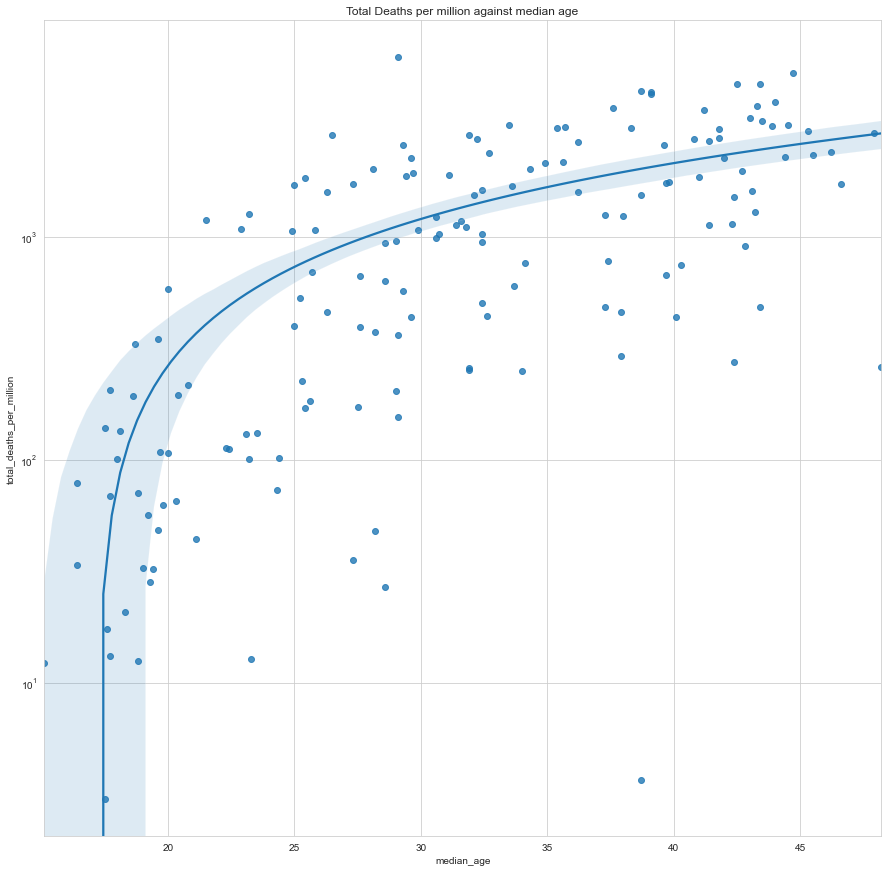

In [22]:
regPlotter(df_diab, 'median_age', 'total_deaths_per_million', 
           'log', 'Total Deaths per million against median age')

In [23]:
#clear positive trend, especially from younger to middle aged

In [24]:
bubbleScatter(df_diab, 'median_age', 'total_deaths_per_million', 'hospital_beds_per_thousand',
             'location', 'linear', 'log', 'deaths/mil against median age')

In [25]:
bubbleScatter(df_diab, 'median_age', 'total_deaths_per_million', 'diabetes_prevalence',
             'location', 'linear', 'log', 'deaths/mil against median age, size is diabetes',
             'continent')

With all continents (except asia it seems), there seems to be a  positive correlation between median age and deaths/thousand.
However, diabetes does not seem to be a DETERMINING factor as bubbles of all sizes seem to be all across the graph.
Let's analyse diabetes in further detail rather than just a visual analysis.
European countries and South American countries seem to have been hit worst with the highest lines. 
European countries all have very high median ages too.
We will analyse Europe and Africa in greater detail later

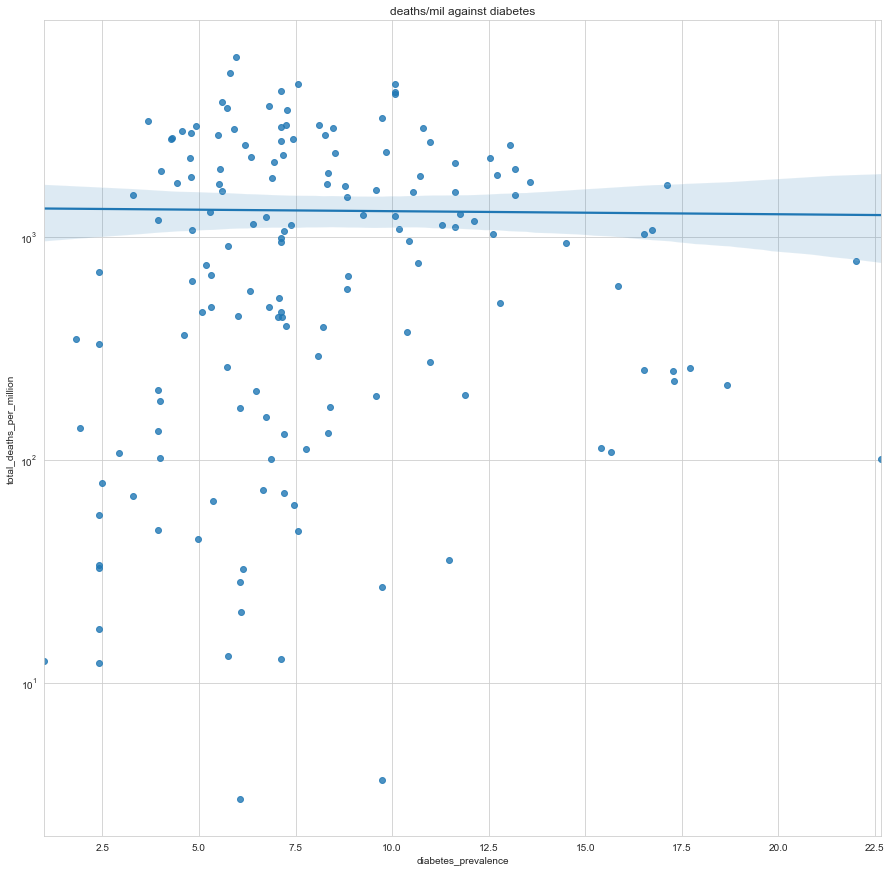

In [26]:
regPlotter(df_diab, 'diabetes_prevalence', 'total_deaths_per_million', 'log', 'deaths/mil against diabetes')

In [27]:
#in fact, the line is downward sloping. diabetes isn't as determining a factor as old age. 
#semi-log graph used here. one axis logarithmic, one linear
#R^2 value VERY low though. points scatterred all over the place

In [28]:
bubbleScatter(df_diab, 'cardiovasc_death_rate', 'total_deaths_per_million', 
              'hospital_beds_per_thousand', 'location', 'linear', 'log', 
              'deaths/mil against cardiovascular death rate, size is hospital beds per thou',
              'red')

Countries with a LOWER cardiovasc death rate are getting MORE deaths per million? Bizarre.
We would expect more beds to lead to less deaths. clearly this has not been the case as we have small circles below and under the line.
We saw a seemingly low correlation between more beds and less deaths earlier too. We can examine that further here.

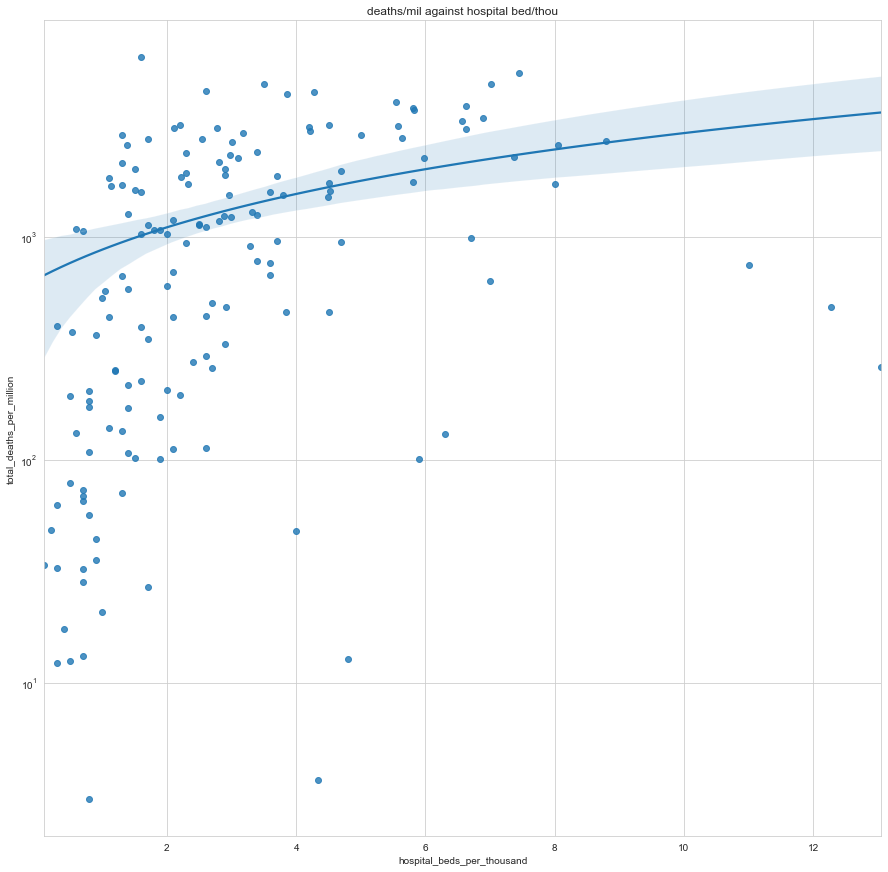

In [29]:
regPlotter(df_diab, 'hospital_beds_per_thousand', 'total_deaths_per_million',
           'log', 'deaths/mil against hospital bed/thou')

In [30]:
#very slight incline, very low R^2 value. minimal correlation

This data begs the question - have richer countries dealt with the virus worse?
To examine this, lets consider Europe and Africa, the contnents with the highest and lowest average gdp per capita
respectively.

Europe v. Africa section

In [31]:


df_diab_af_eur = two_continent_df(df_comp, 'Europe', 'Africa')

# df_diab_af_eur = df_comp[df_comp['continent']=='Europe']
# df_diab_af_eur = df_diab_af_eur.append(df_comp[df_comp['continent']=='Africa'])

df_diab_af = single_continent_df(df_diab_af_eur, 'Africa')
df_diab_eur = single_continent_df(df_diab_af_eur, 'Europe')

# df_diab_af_eur[df_diab_af_eur['continent']=='Africa']
# df_diab_eur = df_diab_af_eur[df_diab_af_eur['continent']=='Europe']


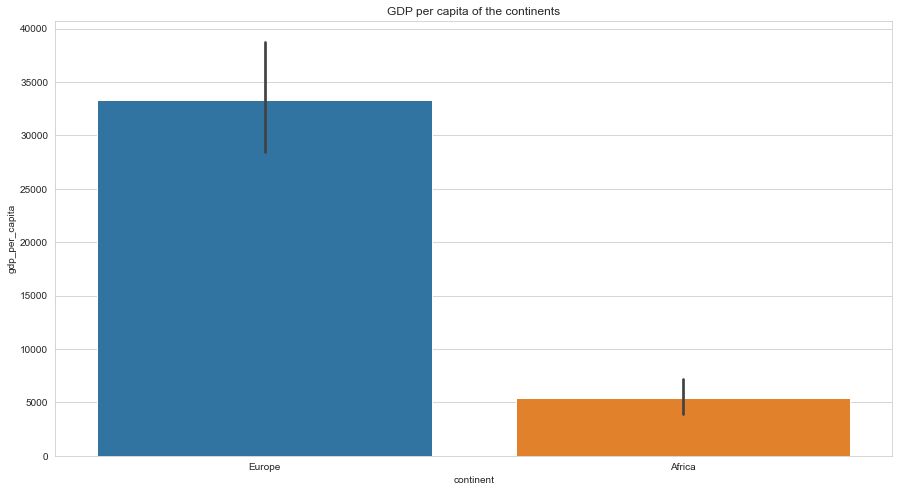

In [32]:
sns_barplot('continent', 'gdp_per_capita', df_diab_af_eur,'GDP per capita of the continents')

# fig = plt.figure(figsize = (15,8))
# sns.barplot(x = 'continent', y= 'gdp_per_capita',data = df_diab_af_eur) 
# plt.title('GDP per capita of the continents')

In [33]:
#black lines represents standard deviation
#by defualt, when whole continents are plotted, the mean of all countries in the continent is plotted

In [34]:
i_barplot('continent', 'gdp_per_capita', 'location', 'group', df_diab_af_eur)

# fig = px.bar(df_diab_af_eur, x="continent", y="gdp_per_capita",
#              color='location', barmode = 'group',
#              height=700)
# fig.show()

In [35]:
#another nice graph allowing us to examine individual countries

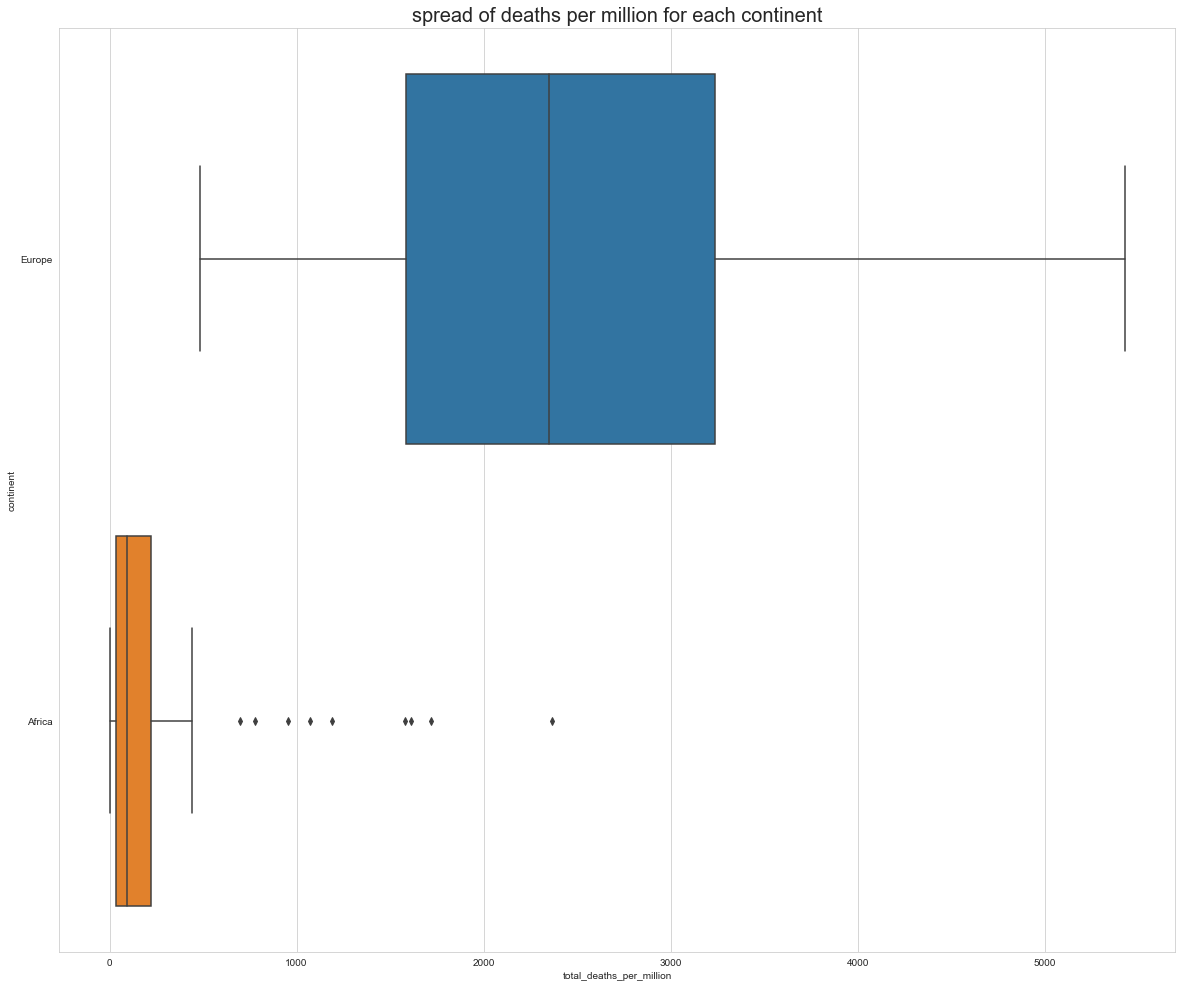

In [36]:
boxPlotter('total_deaths_per_million', 'continent', df_diab_af_eur, 'h',
          'spread of deaths per million for each continent')

In [37]:
#black dots are countries that lie ABOVE IQR + 1.5std
#median of africa is not visible here- it is 6.4 (1dp)


#huge spread of deaths per million in europe, but all deaths are concentrated at bottom for africa
#africa has a much smaller IQR: 10.872 , compared to europes IQR of 196.666
#africa std = 26, europe std = 256 (both figures rounded to nearest whole number)
#this point isemphasised by the fact that we have plotted 51 European countries and 55 african


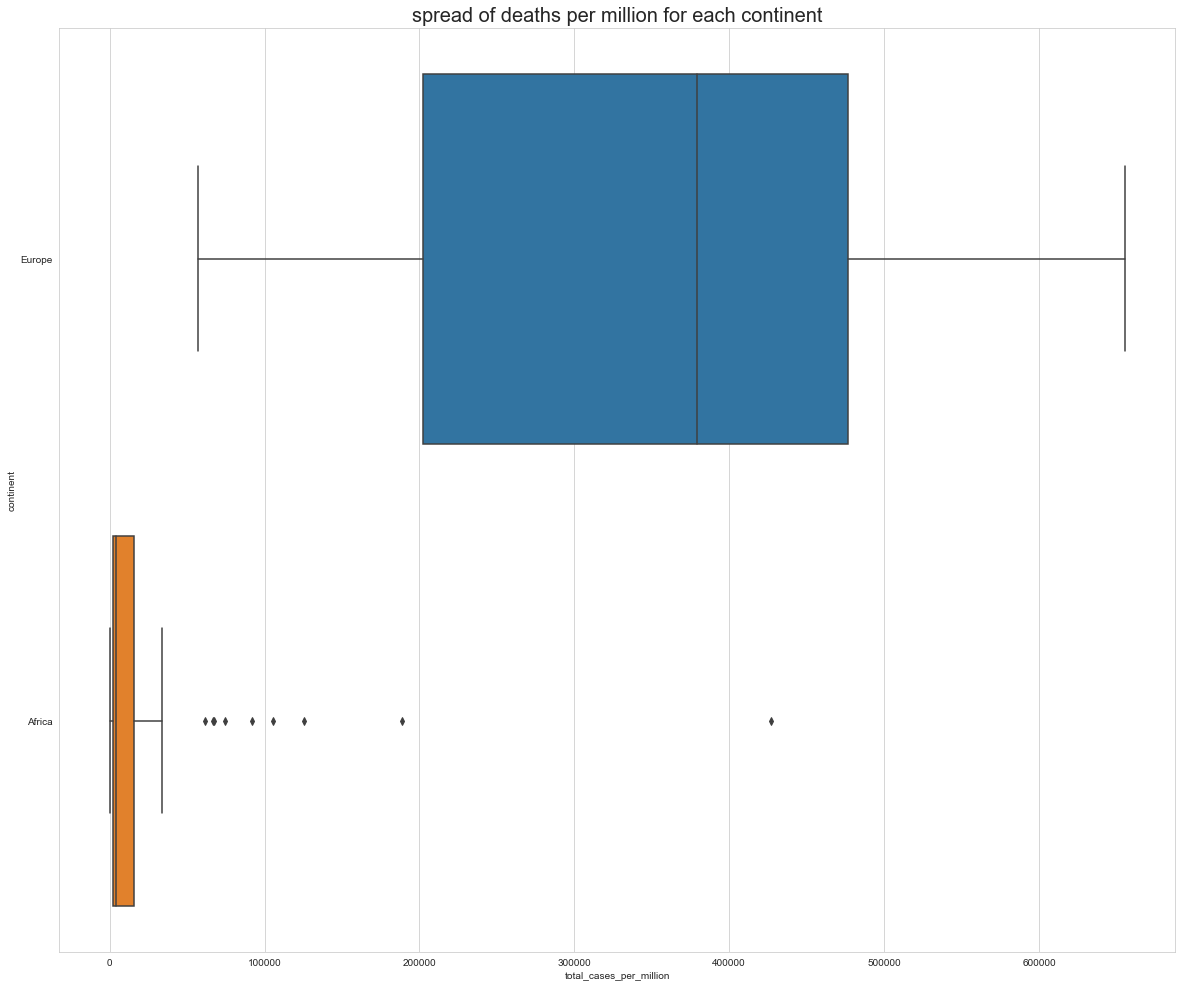

In [38]:
boxPlotter('total_cases_per_million', 'continent', df_diab_af_eur, 'h',
          'spread of deaths per million for each continent')

Now we are ready to start looking at HOW this has happenned.

In [39]:
#constructing a separate dataframe that we can use for our bar chart. atm, male and female smokers are in two separate
#columns but we want them in one column so we can use gender as a hue in our graph

df_af_eur_smo_male = smoker_df(df_diab_af_eur, 'male_smokers', 'male')
df_af_eur_smo_female = smoker_df(df_diab_af_eur, 'female_smokers', 'female')

# df_af_eur_smo_male = df_diab_af_eur[['male_smokers','continent','location']]
# df_af_eur_smo_male['male or female'] = 'male'
# df_af_eur_smo_male.rename(columns={'male_smokers': 'smoking rate'}, inplace = True)

# df_af_eur_smo_female = df_diab_af_eur[['female_smokers','continent','location']]
# df_af_eur_smo_female['male or female'] = 'female'
# df_af_eur_smo_female.rename(columns={'female_smokers': 'smoking rate'}, inplace = True)

df_af_eur_smo = df_af_eur_smo_male.append(df_af_eur_smo_female)


<AxesSubplot:xlabel='continent', ylabel='smoking rate'>

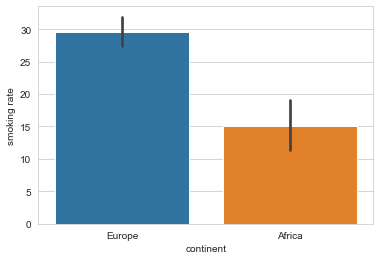

In [40]:
sns.barplot(x = 'continent', y = 'smoking rate', data = df_af_eur_smo)

<AxesSubplot:xlabel='continent', ylabel='smoking rate'>

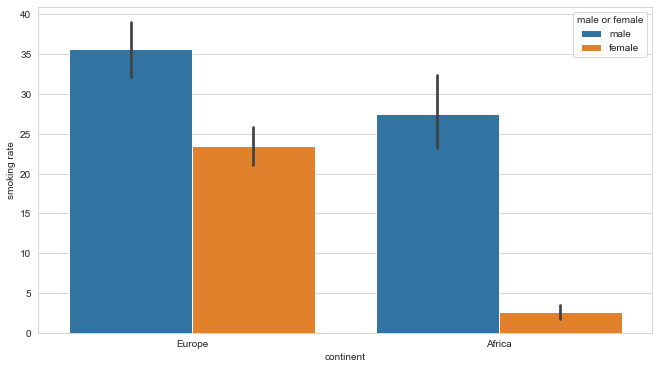

In [41]:
plt.figure(figsize = (11,6))
sns.barplot(x = 'continent', y = 'smoking rate', data = df_af_eur_smo, hue = 'male or female')

In [42]:
df_diab_af_eur['smoking average'] = (df_diab_af_eur['male_smokers'] + df_diab_af_eur['female_smokers'])/2

In [43]:
fig = px.bar(df_diab_af_eur, x="continent", y="smoking average",
             color = 'location', barmode = 'group',
             height=700)
fig.show()

For this interactive plot, we used our original dataframe for africa and europe because we weren't sorting by sex - we used average of male and female smokers

Clearly more smokers in europe:
1 more people can afford them? is that the tie with gdp?
2 can we then see if this links to cardiovascular health?

<AxesSubplot:xlabel='continent', ylabel='extreme_poverty'>

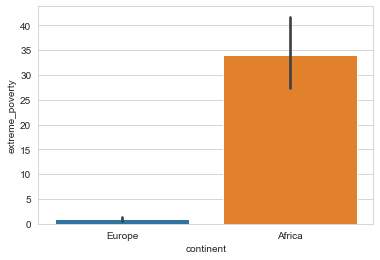

In [44]:
#1: poverty
sns.barplot(x = 'continent', y = 'extreme_poverty', data = df_diab_af_eur)

In [45]:
i_barplot('continent', 'extreme_poverty', 'location','group', df_diab_af_eur)
# fig = px.bar(df_diab_af_eur, x="continent", y="extreme_poverty",
#              color='location', barmode = 'group',
#              height=700)
# fig.show()

In [46]:
#ridiculously huge difference in poverty. -> less money to buy cigarettes? but unhealthier foods, access to healthcare,
#unclean living conditions etc

<AxesSubplot:xlabel='continent', ylabel='cardiovasc_death_rate'>

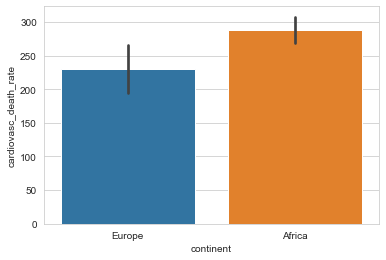

In [47]:
#2: link to cardiovascular health?
sns.barplot(x = 'continent',y =  'cardiovasc_death_rate', data = df_diab_af_eur)

The low gdp per capita implies lower living standards and reduced access to higher quality and perhaps healthier food. Since smoking is still higher in europe and so are deaths, cardiovascular health doesn't seem to play a huge role.
Even if it did, the bars here are not too far apart, especially when considering the larger std of european data.

Text(0.5, 1.0, 'handwashing facilities for each continent')

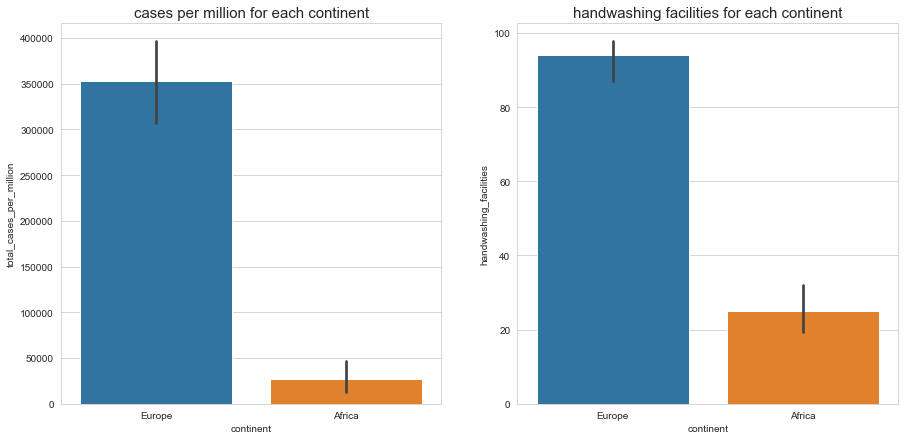

In [48]:
f, axes = plt.subplots(1, 2)

f.set_figheight(7)
f.set_figwidth(15)
ax1 = sns.barplot(x = 'continent',y =  'total_cases_per_million', data = df_diab_af_eur, ax = axes[0])
ax1.set_title('cases per million for each continent', fontsize= 15)
ax2 = sns.barplot(x = 'continent',y =  'handwashing_facilities', data = df_diab_af_eur, ax = axes[1])
ax2.set_title('handwashing facilities for each continent', fontsize = 15)

#we are considering cases per million rather than deaths here as handwashing facilities have been widely promoted as
#reducing spread of virus

In [49]:
#clearly not a direct factor. these graphs seem to j be like this bc richer countries have better handwashing facilites,
#but we have already shown that richer countries have bigger factors(higher gdp -> more tobacco, higher pop dens)
#that have given them a worse experience of the pandemic

<AxesSubplot:xlabel='continent', ylabel='population_density'>

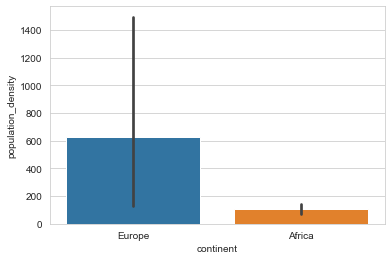

In [50]:
sns.barplot(x = 'continent', y = 'population_density', data = df_diab_af_eur)

In [51]:
#europe has a huge standard deviation? lets filter by country to see why

In [52]:
i_barplot('continent', 'population_density', 'location','group', df_diab_af_eur)
# fig = px.bar(df_diab_af_eur, x="continent", y="population_density",
#              color='location', barmode = 'group',
#              height=700)
# fig.show()

In [53]:
#this shows that the 'average' bar chart doesn't help bc europe has 2 countries boosting the rest significantly
#we can consider the medians of each country instead since the median is not affected much by extreme values.

In [54]:
df_diab_af_eur[df_diab_af_eur['continent']=='Europe']['population_density'].describe()
df_diab_af_eur[df_diab_af_eur['continent']=='Africa']['population_density'].describe()

count     53.000000
mean     103.492453
std      129.747397
min        3.078000
25%       23.500000
50%       64.699000
75%      104.957000
max      622.962000
Name: population_density, dtype: float64

In [55]:
#median for europe population density = 107.396
#median for africa population density = 64.699

In [56]:
df_diab_eur['population_density_median'] = df_diab_af_eur[df_diab_af_eur['continent']=='Europe']['population_density'].median()
df_diab_af['population_density_median'] = df_diab_af_eur[df_diab_af_eur['continent']=='Africa']['population_density'].median()

In [57]:
#append them again. becomes the same dataframe just with medians of pop density
df_diab_af_eur =  df_diab_eur.append(df_diab_af)

In [58]:
df_diab_af_eur

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,population_density_median
2676,ALB,Europe,Albania,2022-07-31,312097.0,716.0,1029.571,3545.0,2.0,2.571,...,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN,107.396
4446,AND,Europe,Andorra,2022-07-31,45508.0,NaN,NaN,153.0,0.0,0.000,...,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN,107.396
12489,AUT,Europe,Austria,2022-07-31,4774043.0,NaN,NaN,20317.0,0.0,13.000,...,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN,107.396
17757,BLR,Europe,Belarus,2022-07-31,994037.0,0.0,0.000,7118.0,0.0,0.000,...,46.1,NaN,11.00,74.79,0.823,NaN,NaN,NaN,NaN,107.396
18666,BEL,Europe,Belgium,2022-07-31,4414255.0,NaN,NaN,32228.0,NaN,NaN,...,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN,107.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187598,TUN,Africa,Tunisia,2022-07-31,1128693.0,NaN,NaN,29041.0,NaN,NaN,...,65.8,78.687,2.30,76.70,0.740,NaN,NaN,NaN,NaN,64.699
190906,UGA,Africa,Uganda,2022-07-31,169230.0,0.0,36.000,3628.0,0.0,0.000,...,16.7,21.222,0.50,63.37,0.544,NaN,NaN,NaN,NaN,64.699
201967,ESH,Africa,Western Sahara,2022-04-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,70.26,NaN,NaN,NaN,NaN,NaN,64.699
204598,ZMB,Africa,Zambia,2022-07-31,329483.0,NaN,NaN,4015.0,0.0,0.286,...,24.7,13.938,2.00,63.89,0.584,NaN,NaN,NaN,NaN,64.699


<AxesSubplot:xlabel='continent', ylabel='population_density_median'>

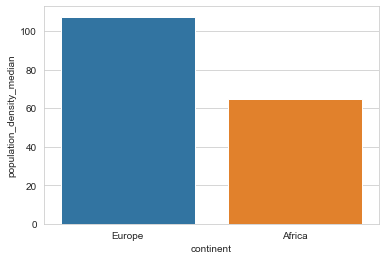

In [59]:
sns.barplot(x = 'continent', y = 'population_density_median', data = df_diab_af_eur)

In [60]:
#population density then, another factor that has contributed to europes higher case + death rate?

In [61]:
df_str = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_nat_latest.csv')

In [62]:
stringency_countries = np.array(df_str['CountryName'].unique())

In [63]:
df_str['CountryName'].nunique()
#185 countries have stringency index. some may be NaN values though

187

The stringency index values for each country ARE there but hidden in dataset.
They're different for each date! we will consider the maximum for the following reason:
Two countries who have different spreads of stringency index could have the same mean and this wouldnt tell us anything about 
the impact of the SEVERITY of lockdown

In [64]:
df_temp = df_str[['CountryName','StringencyIndex_Average']]  #temporary dataframe we will use to construct our new dataframe with maximum stringency values
df_temp

,CountryName,StringencyIndex_Average
0,Aruba,0.0
1,Aruba,0.0
2,Aruba,0.0
3,Aruba,0.0
4,Aruba,0.0
...,...,...
176523,Zimbabwe,NaN
176524,Zimbabwe,NaN
176525,Zimbabwe,NaN
176526,Zimbabwe,NaN


In [65]:
#for each country, there are different stringency values for different dates
#with this 'for' loop we create a dataframe with the MAXIMUM stringency value of each country since the start of the dataset

starting_df = df_temp[df_temp['CountryName'] =='Aruba']
starting_df = starting_df[starting_df['StringencyIndex_Average'] ==  df_temp[df_temp['CountryName']=='Aruba']['StringencyIndex_Average'].max()]
starting_df = starting_df.drop_duplicates()
 
#the reason for the starting df is simply to have SOMETHING to append data to- we cannot append data to an empty dataframe
    
for country in stringency_countries:
   
     
    temp = df_temp[df_temp['CountryName'] ==country]
    temp = temp[temp['StringencyIndex_Average'] ==  df_temp[df_temp['CountryName']==country]['StringencyIndex_Average'].max()]
    temp = temp.drop_duplicates()
    
    #here, we locate the rows where stringency index is at the country's max and grab one of them by removing duplicates
    
    starting_df = starting_df.append(temp)
    #on every iteration, we add a new country's row to the dataframe


In [66]:
starting_df
#as seen we have two 'Aruba' values at the top. we can remove them as such:

,CountryName,StringencyIndex_Average
100,Aruba,88.89
100,Aruba,88.89
1046,Afghanistan,84.26
1974,Angola,90.74
2940,Albania,89.81
...,...,...
172605,Vanuatu,85.19
172872,Yemen,64.81
173781,South Africa,87.96
174762,Zambia,70.83


In [67]:
df_stringency = starting_df.drop_duplicates()
df_stringency

,CountryName,StringencyIndex_Average
100,Aruba,88.89
1046,Afghanistan,84.26
1974,Angola,90.74
2940,Albania,89.81
4259,Andorra,65.74
...,...,...
172605,Vanuatu,85.19
172872,Yemen,64.81
173781,South Africa,87.96
174762,Zambia,70.83


In [68]:
#so now we have all our countries with maximum values

In [69]:
df_stringency.columns = 'location','Stringency Index Max'

df_stringency.sort_values('location', inplace = True)

df_stringency


#now its sorted alphabetically and has more appropriate column names
#can we get this stringency index max data back into df_comp even tho the countries don't all align

,location,Stringency Index Max
1046,Afghanistan,84.26
2940,Albania,89.81
46360,Algeria,92.13
4259,Andorra,65.74
1974,Angola,90.74
...,...,...
169548,Venezuela,97.22
170955,Vietnam,96.30
172872,Yemen,64.81
174762,Zambia,70.83


In [70]:
# for graphing purposes we would like them to be sorted by continent so lets do that.
# we also want to align the data set with the original df comp to get deaths, cases etc for eaach country
# it is easier to do this in one big step

In [71]:
l = common_countries(df_comp, df_stringency)
# list(pd.concat([df_comp['location'], df_stringency['location']]).drop_duplicates(keep = False))
#countries that aren't in BOTH stringency and df comp. we need datasets to align so we remove values that aren't in both

In [72]:
stringency_countries_ava = list(df_stringency['location'])   #stringency countries available, in contrast to all countries
#in the stringency dataset bc some had nan values

comp_countries = list(df_comp['location'])

#lists of countries in both datasets

In [73]:
df_stringency.set_index('location', inplace = True)

In [74]:

df_stringency = drop_values_from(df_stringency, l, stringency_countries_ava)

# for item in l :
#     if item in stringency_countries_ava:
#         df_stringency.drop(item, inplace = True)


In [75]:
df_stringency #now it has only values that are IN df comp

,Stringency Index Max
location,
Afghanistan,84.26
Albania,89.81
Algeria,92.13
Andorra,65.74
Angola,90.74
...,...
Venezuela,97.22
Vietnam,96.30
Yemen,64.81


In [76]:
df_comp_str = df_comp[['location', 'continent','total_cases_per_million','total_deaths_per_million']]
df_comp_str.sort_values('location' , inplace = True)
df_comp_str.set_index('location', inplace = True)
df_comp_str   #same process for original data set, comp. we are also bring cases and deaths to use later

,continent,total_cases_per_million,total_deaths_per_million
location,,,
Afghanistan,Asia,4632.207,193.220
Africa,NaN,8803.488,183.878
Albania,Europe,109327.042,1241.807
Algeria,Africa,6054.013,155.643
Andorra,Europe,575802.819,1935.876
...,...,...,...
Wallis and Futuna,Oceania,65451.105,602.047
Western Sahara,Africa,NaN,NaN
Yemen,Asia,360.109,65.218


In [77]:
df_comp_str = drop_values_from(df_comp_str, l, comp_countries)

# for item in l :
#     if item in comp_countries:
#         df_comp_str.drop(item, inplace = True)


In [78]:
df_comp_str
#175 countries, just like the updated df_stringency

,continent,total_cases_per_million,total_deaths_per_million
location,,,
Afghanistan,Asia,4632.207,193.220
Albania,Europe,109327.042,1241.807
Algeria,Africa,6054.013,155.643
Andorra,Europe,575802.819,1935.876
Angola,Africa,2964.922,55.414
...,...,...,...
Venezuela,South America,19001.367,204.363
Vietnam,Asia,110596.595,442.124
Yemen,Asia,360.109,65.218


In [79]:
df_stringency

,Stringency Index Max
location,
Afghanistan,84.26
Albania,89.81
Algeria,92.13
Andorra,65.74
Angola,90.74
...,...
Venezuela,97.22
Vietnam,96.30
Yemen,64.81


In [80]:
df_str_final = pd.concat([df_comp_str, df_stringency], axis = 1)
df_str_final

,continent,total_cases_per_million,total_deaths_per_million,Stringency Index Max
location,,,,
Afghanistan,Asia,4632.207,193.220,84.26
Albania,Europe,109327.042,1241.807,89.81
Algeria,Africa,6054.013,155.643,92.13
Andorra,Europe,575802.819,1935.876,65.74
Angola,Africa,2964.922,55.414,90.74
...,...,...,...,...
Venezuela,South America,19001.367,204.363,97.22
Vietnam,Asia,110596.595,442.124,96.30
Yemen,Asia,360.109,65.218,64.81


In [81]:
#now we just need to change the index so that location is a column 

In [82]:
df_str_final.reset_index(inplace = True)
df_str_final

,location,continent,total_cases_per_million,total_deaths_per_million,Stringency Index Max
0,Afghanistan,Asia,4632.207,193.220,84.26
1,Albania,Europe,109327.042,1241.807,89.81
2,Algeria,Africa,6054.013,155.643,92.13
3,Andorra,Europe,575802.819,1935.876,65.74
4,Angola,Africa,2964.922,55.414,90.74
...,...,...,...,...,...
177,Venezuela,South America,19001.367,204.363,97.22
178,Vietnam,Asia,110596.595,442.124,96.30
179,Yemen,Asia,360.109,65.218,64.81
180,Zambia,Africa,16919.883,206.182,70.83


In [83]:
#here we have our new dataframe, ready to use!

In [84]:
df_str_final['Stringency Index Max'].describe()

count    182.000000
mean      83.142747
std       17.748514
min        0.000000
25%       79.630000
50%       87.040000
75%       93.520000
max      100.000000
Name: Stringency Index Max, dtype: float64

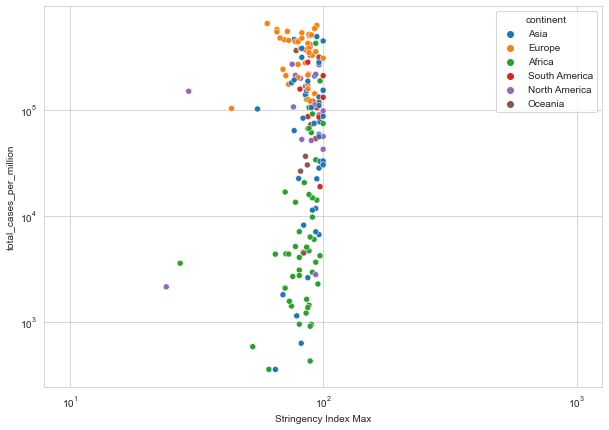

In [85]:
fig = plt.figure(figsize = (10,7))
ax = sns.scatterplot(data = df_str_final, x = 'Stringency Index Max', y = 'total_cases_per_million', hue = 'continent')
ax.set_xscale('log')
ax.set_yscale('log')

In [86]:
fig = go.Figure()

fig = px.scatter(df_str_final, x = 'Stringency Index Max', y = 'total_cases_per_million', trendline = 'ols', 
                 hover_name = 'location')
fig.update_layout( yaxis_type = 'log')
fig.update_layout( xaxis_type = 'log')

fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()


In [87]:
#perhaps we shld consider when each country reacted?

In [88]:
df_temp1 = df_str[['CountryName','StringencyIndex_Average','Date']]
df_temp1

initial_df = df_temp1[df_temp1['CountryName'] == 'Aruba']
initial_df.dropna(inplace = True)
initial_df_new = initial_df[(initial_df != 0).all(1)]
initial_df_new 

,CountryName,StringencyIndex_Average,Date
75,Aruba,11.11,20200316
76,Aruba,22.22,20200317
77,Aruba,33.33,20200318
78,Aruba,33.33,20200319
79,Aruba,33.33,20200320
...,...,...,...
926,Aruba,25.93,20220715
927,Aruba,25.93,20220716
928,Aruba,25.93,20220717
929,Aruba,25.93,20220718


In [89]:
#lets create a for loop that grabs the date at which each country first reacted
#initial df created for the same reason as starting df the first time we did this
initial_df = df_temp1[df_temp1['CountryName'] == 'Aruba']
initial_df.dropna(inplace = True)
initial_df_new = initial_df[(initial_df != 0).all(1)]
initial_df_new = initial_df_new[initial_df_new['Date'] == initial_df_new['Date'].min()]
#this last line chooses earliest date since the dates are given as integers


for country in stringency_countries:
    
    temp = df_temp1[df_temp1['CountryName'] == country]
    temp.dropna(inplace = True)
    temp_new = temp[(temp != 0).all(1)]
    temp_new = temp_new[temp_new['Date'] == temp_new['Date'].min()]
    
    initial_df_new = initial_df_new.append(temp_new)

In [90]:
initial_df_new

,CountryName,StringencyIndex_Average,Date
75,Aruba,11.11,20200316
75,Aruba,11.11,20200316
997,Afghanistan,8.33,20200223
1924,Angola,5.56,20200206
2876,Albania,5.56,20200214
...,...,...,...
171868,Vanuatu,11.11,20200301
172826,Yemen,11.11,20200315
173718,South Africa,2.78,20200123
174691,Zambia,16.67,20200221


In [92]:
initial_df_new = initial_df_new.drop_duplicates()
initial_df_new.columns = 'location','Stringency Index', 'date'
initial_df_new.sort_values('location')
initial_df_new.set_index('location', inplace = True)
initial_df_new
#here is our dataframe with earliest dates of response

,Stringency Index,date
location,,
Aruba,11.11,20200316
Afghanistan,8.33,20200223
Angola,5.56,20200206
Albania,5.56,20200214
Andorra,9.26,20200313
...,...,...
Vanuatu,11.11,20200301
Yemen,11.11,20200315
South Africa,2.78,20200123


In [93]:
#we can use the same method as before to align the countries with df_comp
#l is list of countries that don't exist in these countries ^ AND df comp

In [94]:
initial_df_new = drop_values_from(initial_df_new, l, stringency_countries_ava)


In [95]:
initial_df_new.sort_values('location', inplace = True)

In [96]:
initial_df_new

,Stringency Index,date
location,,
Afghanistan,8.33,20200223
Albania,5.56,20200214
Algeria,5.56,20200305
Andorra,9.26,20200313
Angola,5.56,20200206
...,...,...
Venezuela,11.11,20200228
Vietnam,2.78,20200125
Yemen,11.11,20200315


In [97]:
df_comp_str  #we had this dataframe before

,continent,total_cases_per_million,total_deaths_per_million
location,,,
Afghanistan,Asia,4632.207,193.220
Albania,Europe,109327.042,1241.807
Algeria,Africa,6054.013,155.643
Andorra,Europe,575802.819,1935.876
Angola,Africa,2964.922,55.414
...,...,...,...
Venezuela,South America,19001.367,204.363
Vietnam,Asia,110596.595,442.124
Yemen,Asia,360.109,65.218


In [98]:
initial_df_new = initial_df_new.loc[~initial_df_new.index.duplicated(keep='first')]

In [99]:
df_comp_str = df_comp_str.loc[~df_comp_str.duplicated(keep='first')]
#doing this to drop duplicates, otherwise concat wouldn't work

In [100]:
df_str_final_new = pd.concat([df_comp_str,initial_df_new], axis =1 )
df_str_final_new

,continent,total_cases_per_million,total_deaths_per_million,Stringency Index,date
location,,,,,
Afghanistan,Asia,4632.207,193.220,8.33,20200223.0
Albania,Europe,109327.042,1241.807,5.56,20200214.0
Algeria,Africa,6054.013,155.643,5.56,20200305.0
Andorra,Europe,575802.819,1935.876,9.26,20200313.0
Angola,Africa,2964.922,55.414,5.56,20200206.0
...,...,...,...,...,...
Venezuela,South America,19001.367,204.363,11.11,20200228.0
Vietnam,Asia,110596.595,442.124,2.78,20200125.0
Yemen,Asia,360.109,65.218,11.11,20200315.0


In [101]:
df_str_final_new.reset_index(inplace = True)

In [102]:
df_str_final_new['date'].max()

20220101.0

In [109]:
df_no_nan = df_str_final_new.dropna()

In [113]:
fig = plt.figure(figsize = (20,7))
fig = go.Figure()

fig = px.scatter(df_no_nan, x = 'date', y = 'total_cases_per_million', trendline = 'ols', 
                 hover_name = df_no_nan.index, size = 'Stringency Index')

fig.update_layout( yaxis_type = 'log')
fig.update_layout( xaxis_type = 'log')

fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()


<Figure size 1440x504 with 0 Axes>

Some conclusions and notes:
IMPORTANT: note that the virus didn't hit all countries at the same time so perhaps this graph isn't as useful as the previous one.
Also, we haven't taken into account the scale of the problem - e.g., was the country hit hard at first or few cases?


That said, one interesting observation is that countries that reacted later reacted with stricter restrictions - perhaps they felt they were too late and had to keep up.
But the cases per million still range across big range of values regardless of date; suggests other aforementioned factors are more significant

Interactive summary graphs for a bit of fun!

In [114]:
df_PRIME = df_comp[['location','iso_code','total_cases_per_million']].sort_values('location')

In [115]:
data1 = dict(type = 'choropleth',
            locations = df_PRIME['iso_code'],
            text = df_PRIME['location'],
            
            z=df_PRIME['total_cases_per_million'],
            colorbar = {'title':'total cases per milion'})

In [116]:
layout1 = dict(title = 'total cases per million',
              geo = dict(showframe = False,
              projection = {'type':'aitoff'}))

#favourite projections:
#hammer,
#mercator,
#orthographic
#natural earth
#aitoff


In [117]:
choromap_prime = go.Figure(data = [data1],layout = layout1)

In [118]:
iplot(choromap_prime)

In [119]:
df_PRIME1 = df_PRIME = df_comp[['location','iso_code','new_cases_per_million']].sort_values('location')

In [120]:
data2 = dict(type = 'choropleth',
            locations = df_PRIME['iso_code'],
            text = df_PRIME['location'],
            colorscale= 'Blackbody',
            z=df_PRIME['new_cases_per_million'],
            colorbar = {'title':'new cases per milion'})

In [121]:
layout2 = dict(title = 'new cases per million',
              geo = dict(showframe = False,
              projection = {'type':'aitoff'}))

#favourite projections:


#hammer,
#mercator,
#orthographic
#natural earth
#aitoff

In [122]:
choromap_prime1 = go.Figure(data = [data2],layout = layout2)

In [123]:
iplot(choromap_prime1)